In [7]:
import keras
import tensorflow as tf
print(keras.__version__)

2.3.1


In [8]:
IMG_SIZE = 224

In [9]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [10]:
inceptionResNetV2 = tf.keras.applications.InceptionResNetV2(
    input_shape = IMG_SHAPE,
    include_top=False,
    weights="imagenet")
inceptionResNetV2.trainable=False

Xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet")
Xception.trainable=False

In [11]:
flatten_layer = tf.keras.layers.Flatten()
dense_layer = tf.keras.layers.Dense(128,activation='relu')
dropout_layer = tf.keras.layers.Dropout(0.5)
prediction_layer = tf.keras.layers.Dense(10,activation='softmax')

In [12]:
inceptionResNetV2_model = tf.keras.Sequential([
  inceptionResNetV2,
  flatten_layer,
  dropout_layer,
  dense_layer,
  prediction_layer
])

In [13]:
learning_rate = 0.00001
inceptionResNetV2_model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["accuracy"])
inceptionResNetV2_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 38400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4915328   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 59,253,354
Trainable params: 4,916,618
Non-trainable params: 54,336,736
_________________________________________________________________


In [14]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        r'D:\BigDataScience\Dataset\archive\Tobacco3482-jpg\Balanced_train',
        target_size=(224, 224),
        batch_size=16)
test_generator = test_datagen.flow_from_directory(
        r'D:\BigDataScience\Dataset\archive\Tobacco3482-jpg\Balanced_test',
        target_size=(224, 224),
        batch_size=16)

Found 1909 images belonging to 10 classes.
Found 269 images belonging to 10 classes.


In [15]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [16]:
inceptionResNetV2_history = inceptionResNetV2_model.fit(train_generator,
                    epochs=50, 
                    steps_per_epoch =1909/16,
                    validation_steps=269/16,
                    validation_data=test_generator)

Epoch 1/50
120/119 [==============================] - 65s 541ms/step - loss: 2.0758 - accuracy: 0.2923 - val_loss: 1.3720 - val_accuracy: 0.5576
Epoch 2/50
120/119 [==============================] - 61s 507ms/step - loss: 1.4185 - accuracy: 0.5139 - val_loss: 1.1746 - val_accuracy: 0.5948
Epoch 3/50
120/119 [==============================] - 61s 508ms/step - loss: 1.1782 - accuracy: 0.6003 - val_loss: 1.0571 - val_accuracy: 0.6059
Epoch 4/50
120/119 [==============================] - 61s 511ms/step - loss: 1.0306 - accuracy: 0.6579 - val_loss: 0.9876 - val_accuracy: 0.6617
Epoch 5/50
120/119 [==============================] - 62s 516ms/step - loss: 0.9399 - accuracy: 0.6883 - val_loss: 0.9625 - val_accuracy: 0.6580
Epoch 6/50
120/119 [==============================] - 61s 507ms/step - loss: 0.8455 - accuracy: 0.7040 - val_loss: 0.9988 - val_accuracy: 0.6283
Epoch 7/50
120/119 [==============================] - 61s 510ms/step - loss: 0.7818 - accuracy: 0.7271 - val_loss: 0.8976 - val_ac

In [17]:
inceptionResNetV2_model.save('inceptionResNetV2_history_model.h5')

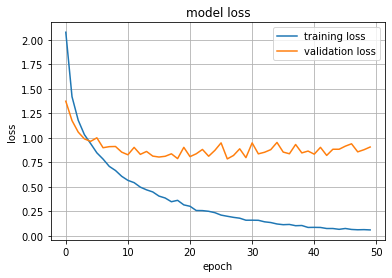

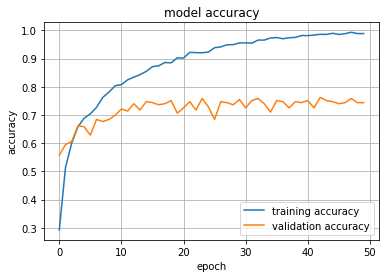

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.plot(inceptionResNetV2_history.history['loss'])
plt.plot(inceptionResNetV2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

plt.plot(inceptionResNetV2_history.history['accuracy'])
plt.plot(inceptionResNetV2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()